<a href="https://colab.research.google.com/github/Arti66x/TPNS_lab1/blob/main/TPNS_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

class Linear:
  def __init__(self,input_size,output_size):
    self.W = np.random.normal(0,1,(input_size,output_size))
    self.dW = np.zeros_like(self.W)
    self.b = np.random.normal(0,1,output_size)
    self.db= np.zeros_like(self.b)

    self.input_size = input_size
    self.output_size = output_size
  def forward(self,X):
    self.output = np.dot(X,self.W)+self.b
    self.X = X
    return self.output
  def backward(self,grad):
    self.dW += np.dot(self.X.reshape(self.input_size,1),grad.reshape(1,self.output_size))
    self.db+=grad
    dX = np.dot(self.W,grad,)
    return dX
  def update_weights(self,lr):
    #  print(lr * self.dW)
     self.W = self.W - lr * self.dW
     self.b = self.b - lr * self.db
     self.dW.fill(0.)
     self.db.fill(0.)
class Sigmoid:
  def __init__(self):
    pass
  def forward(self,X):
    self.output = sigmoid(X)
    self.X = X
    return self.output
  def backward(self,grad):
    dX = self.output * (1-self.output)*grad
    return dX
  def update_weights(self,lr):
    pass
class Model:
    def __init__(self,input):
      self.output = input
      self.layers = []
    def Linear(self,count,activation = True):
      self.layers.append(Linear(self.output,count))
      self.output = count
      if activation:
        self.layers.append(Sigmoid())

    def forward(self,input):
      for l in self.layers:
        input=l.forward(input)
      return input
    def backward(self,grad):
      for l in reversed(self.layers):
        # print(grad)
        grad=l.backward(grad)
    def update_weights(self,lr):
      for l in self.layers:
        l.update_weights(lr)

def train(nn, train_dataset,true_label,lr,num_epoch): 
  train_num = train_dataset.shape[0]
  Loss_list = []
  for j in range(num_epoch):
    order = np.random.permutation(train_num) #порядок обхода
    Loss = np.zeros_like(true_label[0])
    for i in order:
      input =np.nan_to_num(train_dataset[i])
      y_pred = nn.forward(input)
      y_true = true_label[i]
      Loss += np.nan_to_num((y_pred-y_true)**2/train_num)
      dLoss =  np.nan_to_num(2*(y_pred-y_true)/train_num)
      nn.backward(dLoss)
    nn.update_weights(lr)
    if (j % 10 == 0):
      print('epoch ',j,' finished with Loss: ',Loss)
    Loss_list.append(Loss)
  
  for i in range(Loss_list[0].size):
    print('Loss#',i)
    plot = []
    for l in Loss_list:
      plot.append(l[i])
    plt.plot(plot)
    plt.show()


epoch  0  finished with Loss:  [0.08246329 5.26269884]
epoch  10  finished with Loss:  [0.05491031 0.6519308 ]
epoch  20  finished with Loss:  [0.03130004 0.4889487 ]
epoch  30  finished with Loss:  [0.02701184 0.38472891]
epoch  40  finished with Loss:  [0.02565901 0.31316034]
epoch  50  finished with Loss:  [0.02470072 0.26179945]
epoch  60  finished with Loss:  [0.02384717 0.22374771]
epoch  70  finished with Loss:  [0.02308738 0.19484808]
epoch  80  finished with Loss:  [0.02241869 0.17244296]
epoch  90  finished with Loss:  [0.02182936 0.1547593 ]
epoch  100  finished with Loss:  [0.02130542 0.14057598]
epoch  110  finished with Loss:  [0.02083453 0.12903117]
epoch  120  finished with Loss:  [0.0204069  0.11950445]
epoch  130  finished with Loss:  [0.020015   0.11154186]
epoch  140  finished with Loss:  [0.01965313 0.10480642]
epoch  150  finished with Loss:  [0.0193169  0.09904488]
epoch  160  finished with Loss:  [0.01900292 0.09406471]
epoch  170  finished with Loss:  [0.018708

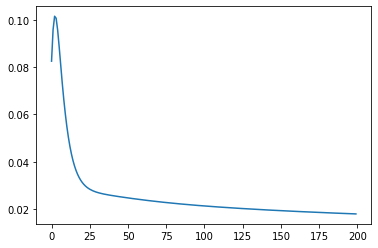

Loss# 1


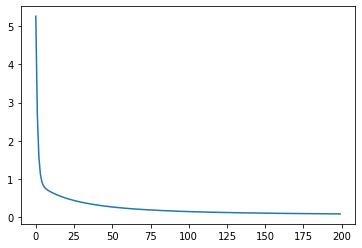

G-total


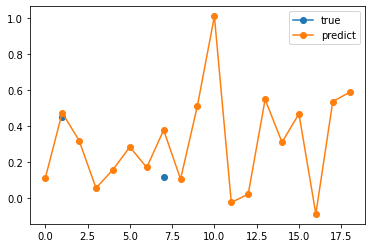

KGF


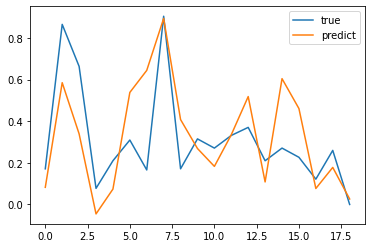

In [172]:
#Работа на датасете, все через одно место
df = pd.read_csv('/content/data.csv',sep=';', encoding = 'windows-1251')
arr = df.to_numpy()
for i in range(arr.shape[1]):     #Нормируем все колонки [0,1] (от выбросов избавились)
  max = np.nanmax(arr[:,i])
  min = np.nanmin(arr[:,i])
  for j in range(arr.shape[0]):
    arr[j,i]=(arr[j,i]-min)/(max-min)


num = arr.shape[0]
vect_len = arr.shape[1]-2
train_num = int(0.8*num)
np.random.shuffle(arr)
train_dataset = arr[:train_num]
test_dataset = arr[train_num:]


perceptron = Model(vect_len)
perceptron.Linear(32)
perceptron.Linear(32)
perceptron.Linear(2,activation = False)
train(perceptron,train_dataset[:,:-2],train_dataset[:,-2:],0.01,200)
Loss = 0



pred_G_total = np.zeros_like(test_dataset[:,-2])
pred_KGF = np.zeros_like(test_dataset[:,-1])
for i,v in enumerate(test_dataset):
  input =np.nan_to_num(v[:-2])
  y_pred = perceptron.forward(input)
  y_true = v[-2:]
  pred_G_total[i] = y_pred[-2]
  pred_KGF[i] = y_pred[-1]
  err = np.nan_to_num((y_pred-y_true)**2)
  # print(y_pred,y_true,err)

x = np.arange(test_dataset.shape[0])
print('G-total')
fig, ax = plt.subplots()
ax.plot(x, test_dataset[:,-2], label = 'true', marker='o')
ax.plot(x, pred_G_total, label = 'predict', marker='o')
ax.legend()
plt.show()
print('KGF')
fig, ax = plt.subplots()
ax.plot(x, test_dataset[:,-1], label = 'true')
ax.plot(x, pred_KGF, label = 'predict')
ax.legend()
plt.show()


epoch  0  finished with Loss:  [12.45949891]
epoch  10  finished with Loss:  [0.44205949]
epoch  20  finished with Loss:  [0.36992915]
epoch  30  finished with Loss:  [0.30853556]
epoch  40  finished with Loss:  [0.25535805]
epoch  50  finished with Loss:  [0.20920546]
epoch  60  finished with Loss:  [0.16946812]
epoch  70  finished with Loss:  [0.13578034]
epoch  80  finished with Loss:  [0.10781705]
epoch  90  finished with Loss:  [0.08518137]
epoch  100  finished with Loss:  [0.06735513]
epoch  110  finished with Loss:  [0.05370159]
epoch  120  finished with Loss:  [0.0435123]
epoch  130  finished with Loss:  [0.0360767]
epoch  140  finished with Loss:  [0.03074606]
epoch  150  finished with Loss:  [0.02697274]
epoch  160  finished with Loss:  [0.02432209]
epoch  170  finished with Loss:  [0.02246497]
epoch  180  finished with Loss:  [0.02116065]
epoch  190  finished with Loss:  [0.02023747]
Loss# 0


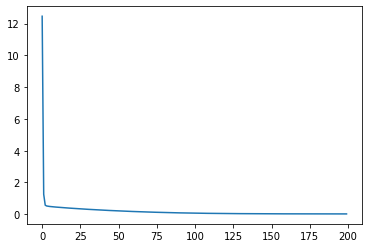

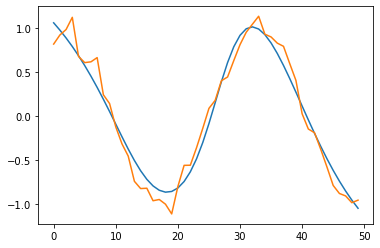

In [148]:
#Попытка апроксимировать синус
noise_level = 0.1
X_train_ = np.arange(-5, 5, 0.2)
real_sin = np.sin(X_train_)
y_train = real_sin+np.random.normal(0,noise_level,len(X_train_))    
X_train_ = X_train_.reshape((X_train_.size,1))
y_train = y_train.reshape((y_train.size,1))

perceptron = Model(1)
perceptron.Linear(32)
perceptron.Linear(32)
perceptron.Linear(1,activation = False)



train(perceptron,X_train_,y_train,0.05,200)
predicted_sin = []
for i in X_train_:
  predicted_sin.append(perceptron.forward(i))
plt.plot(predicted_sin)
plt.plot(y_train)
plt.show()